In [23]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Question: What is the rank of the following matrix?
# $$Z = \begin{bmatrix}1&2&3\\4&5&6\\7&8&9\end{bmatrix}$$

In [24]:
#Matrix Rank is Two
Z = np.array([[1,2,3], [4,5,6], [7,8,9]])
rank = np.linalg.matrix_rank(Z)
print (rank)

2


## Question: Consider a matrix $\mathbf{Y}$ which is the first two columns of $\mathbf{Z}$,
## Is there a vector $\mathbf{x}$ such that
## $$\begin{bmatrix}1&2\\4&5\\7&8\end{bmatrix}\begin{bmatrix}x_{1}\\x_{2}\end{bmatrix} = \begin{bmatrix}3\\6\\9\end{bmatrix}$$
## ?
## Or

In [25]:
Z = np.arange(1, 10).reshape(3, 3)
Y = Z[:, :2]
W = Z[:, -1]
print(Z)
print(Y)
print(W)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2]
 [4 5]
 [7 8]]
[3 6 9]


In [26]:
#np.linalg.solve(Y, W)

## Question: What went wrong?
### This is a case of no solution or infinite many solutions
#### np.linalg.solve take square matrix in Ax = B
---
## Exercise: Find $\mathbf{x}$ based only on the first two rows of $\mathbf{Z}$


In [27]:
# enter code here.
Y2 = Z[0:2]
W2 = np.array([3, 6, 9])

#x1, x2 = np.linalg.solve(Y2, W2)
#No solution

#Legal Inputs for solving the x values
Y1 = Z[0:2][:,:2]
print(Y1)
W1 = np.array([3, 6])
x = np.linalg.solve(Y1, W1)
print (x)

[[1 2]
 [4 5]]
[-1.  2.]


## Find the ranks of the following matrices:

In [28]:
A = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])
#enter code here
rank = np.linalg.matrix_rank(A)
print (rank)

# Rank = 3


3


In [29]:
A = np.array([
    [1, 0, 1],
    [0, 1, 1],
    [0, 0, 0]
])
rank = np.linalg.matrix_rank(A)
print (rank)

2


In [30]:
A = np.array([
    [1, 0, 1],
    [0, 1, 1],
    [0, 0, 0.000001]
])

# enter code here
rank = np.linalg.matrix_rank(A)
print (rank)

3


## Problem: Matrix Rank is exact, not approximate.
----
# Low Rank Approximations
## Consider the following dataset:

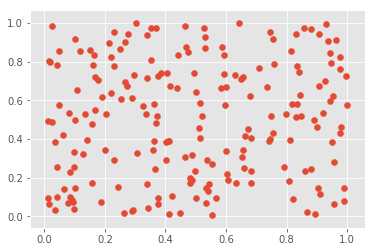

In [31]:
x, y = np.random.rand(200, 2).T
plt.scatter(x, y)

In [32]:
np.linalg.matrix_rank(x)

1

### Draw an ellipse with center at the origin, and major and minor axes as 1 and 0.5 respectively.

In [33]:
from matplotlib.patches import Ellipse
from sklearn.preprocessing import MinMaxScaler

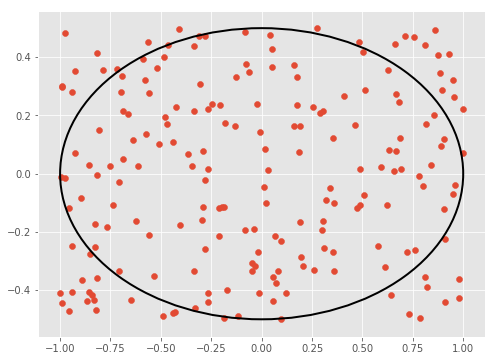

In [34]:
A, B = 1, 0.5
el = Ellipse((0, 0), 2 * A, 2 * B, fill=False, linewidth=2, edgecolor='k')

x = MinMaxScaler((-A, A)).fit_transform(x.reshape(-1, 1)).ravel()
y = MinMaxScaler((-B, B)).fit_transform(y.reshape(-1, 1)).ravel()

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x , y)

ax.add_patch(el)

### Filter the points inside the ellipse

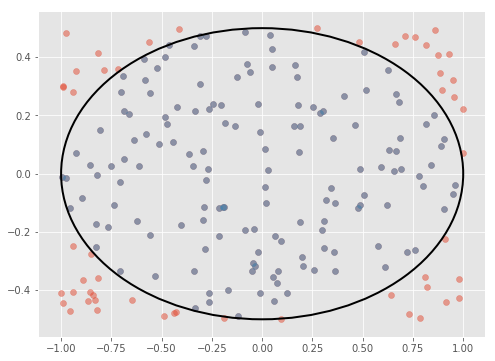

In [35]:
pts_out = (x ** 2) / (A ** 2) + (y ** 2) / (B ** 2) < 1
x_in = x[pts_out]
y_in = y[pts_out]

el = Ellipse((0, 0), 2 * A, 2 * B, fill=False, linewidth=2, edgecolor='k')
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y, alpha=0.5)
ax.scatter(x_in, y_in, alpha=0.5)
ax.add_patch(el)

In [36]:
XNEW = np.c_[x_in, y_in]

## Covariance Matrix of $\mathbf{X_{new}}$

In [37]:
C = np.cov(XNEW.T)
print(C)

[[ 0.25450292 -0.00597893]
 [-0.00597893  0.06217073]]


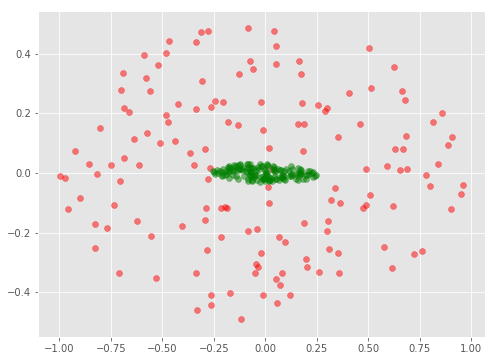

In [65]:
xdiag = np.dot(XNEW, C)
plt.figure(figsize=(8, 6))
plt.scatter(*XNEW.T, alpha=0.5, c='r')
plt.scatter(*xdiag.T, alpha=0.5, c='g')

### What just happened?
### Transformation of the data 
### Key ideas - diagonalization & change of basis
### Introducing Eigenvalues and Eigenvectors

In [39]:
w, v = np.linalg.eig(C)

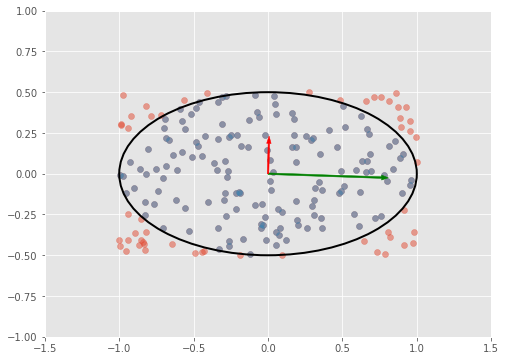

In [40]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(x, y, alpha=0.5)
ax.scatter(x_in, y_in, alpha=0.5)

el = Ellipse((0, 0), 2 * A, 2 * B, fill=False, linewidth=2, edgecolor='k')

ax.add_patch(el)
ax.axis([-1.5, 1.5, -1, 1])


(e1dx, e1dy), (e2dx, e2dy) = (3 * w * v).T
ax.arrow(0, 0, e1dx, e1dy, color='g', width=0.01)
ax.arrow(0, 0, e2dx, e2dy, color='r', width=0.01)

# Exercise: Plot the top 2 principal components of the Iris dataset (given below)

['setosa' 'versicolor' 'virginica']


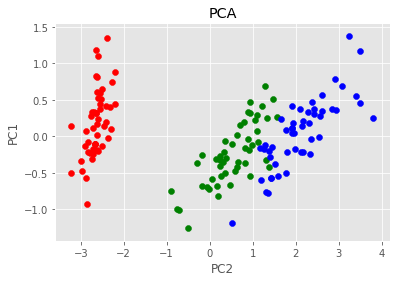

In [64]:
# enter code here
from sklearn.datasets import load_iris
from sklearn import decomposition
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
print (target_names)
pca = decomposition.PCA(n_components=2)
X1 = pca.fit(X).transform(X)
for d, j, target_names in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X1[y==j,0], X1[y==j,1], c=d, label=target_names)
plt.ylabel('PC1')
plt.xlabel('PC2')
plt.title('PCA')

plt.show()